In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.duplicated().sum() # check duplicates

0

In [5]:
data.isnull().sum() # check missing data in all columns

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
for col in data.columns:
    print(col, data[col].isna().sum() / len(data)* 100)
    if (data[col].isna().sum() / len(data)) * 100 >= 50:
        data.drop(col, axis=1, inplace=True)


Name 0.011962437944853162
Platform 0.0
Year_of_Release 1.60894790358275
Genre 0.011962437944853162
Publisher 0.32298582451103536
NA_Sales 0.0
EU_Sales 0.0
JP_Sales 0.0
Other_Sales 0.0
Global_Sales 0.0
Critic_Score 51.33082122136492
Critic_Count 51.33082122136492
User_Score 40.0980919911478
User_Count 54.60254799928226
Developer 39.61361325438124
Rating 40.486871224355525


In [7]:
for col in data.columns:
    numberOfMissingValues = data[col].isna().sum()
    lenOfdata = len(data)
    percentageOfMissingValues = numberOfMissingValues / lenOfdata * 100
    print(col,percentageOfMissingValues)

Name 0.011962437944853162
Platform 0.0
Year_of_Release 1.60894790358275
Genre 0.011962437944853162
Publisher 0.32298582451103536
NA_Sales 0.0
EU_Sales 0.0
JP_Sales 0.0
Other_Sales 0.0
Global_Sales 0.0
User_Score 40.0980919911478
Developer 39.61361325438124
Rating 40.486871224355525


In [8]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [9]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
User_Score         6704
Developer          6623
Rating             6769
dtype: int64

In [10]:
data.drop('Developer', axis=1, inplace=True)

In [11]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN


In [12]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
User_Score         6704
Rating             6769
dtype: int64

In [13]:
data[data.Name.isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN


In [14]:
data.dropna(subset=['Name'], inplace=True)

In [15]:
data.shape

(16717, 12)

In [16]:
data.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
User_Score         6702
Rating             6767
dtype: int64

In [17]:
data.User_Score.value_counts()

User_Score
tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [18]:
for i in data.User_Score :
  if type(i) == str :
    print(i)

8
8.3
8
8.5
6.6
8.4
8.6
7.7
6.3
7.4
8.2
9
7.9
8.1
8.7
7.1
8.4
3.4
6.3
5.3
4.8
6.3
3.2
8.5
8.9
8.2
6.4
8.3
8.7
7.8
8.5
8.9
7.9
8.7
8.4
7.5
6.3
7.5
2.6
7.8
7.2
7.9
9.2
7
9
7.3
2.6
8.4
8.7
7.8
8.4
4.3
8.2
7.4
6.3
6.6
8.7
7.6
8.6
8.5
7.6
5.7
5
9.1
7.6
7.4
8.6
8
7.5
6.5
9.1
9
8.9
9.1
9.1
8.6
8.5
7.3
7.7
8.3
tbd
8.4
8.8
7.4
8.8
4.3
6.9
8.6
8.6
6.4
9
8.8
7.1
9
8.6
7.3
8.1
7.8
7.4
8.3
5.7
8.7
9.4
8.7
7.6
9.1
6.8
9.2
8.8
8.9
6.1
8.9
7.2
8.6
7.7
8
7.8
8.7
8.6
7.9
8.3
7.1
7.6
7.9
7.3
8.9
6.7
6.6
5.4
8.8
8.5
8.1
8.8
8.6
6.1
4
7.6
8.5
6.5
7.5
8
8
9
8
9.2
8.2
7.1
8.5
8.1
8
8.2
7.3
8.7
9
5.4
7.7
8.7
7.7
8.2
8.6
7.6
8.1
8.9
8.4
8.4
8.2
7.9
7.9
8.2
6.4
7.9
3.4
8.9
8.5
7.9
7.5
8.9
8.7
9.1
8.3
4.8
8.1
9
9
4.9
4.5
6.5
7.3
8.9
9.3
7.5
6.2
4.2
8.7
7.8
7.5
7.1
7.2
7.3
7.7
9.1
7.9
8.4
8.9
8.2
8.1
8.3
6
6.3
8.5
7.7
tbd
8.6
9.2
4.9
7.6
8
8
8.8
8.7
8.7
8.7
8.1
6.7
8.6
7.4
9.1
7.9
3.7
4
7
6.9
7.5
8
7.5
7.9
8.8
8.1
7.6
8.5
7.3
8.4
7.9
8.7
7.9
8.9
7.6
7.6
8.7
7.7
8.5
6.9
9
6.2
8
7.8
6.8
7.9
7.5
7.9
4.1
7.5
8.3
6.4


In [19]:
GamesScores = [ ]
for score in data.User_Score :
  try :
    score = float(score)
    GamesScores.append(score)
  except:
    GamesScores.append(0.0)

In [20]:
len(GamesScores)

16717

In [21]:
data.User_Score = GamesScores

In [22]:
data.User_Score

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16714    NaN
16715    NaN
16716    NaN
16717    NaN
16718    NaN
Name: User_Score, Length: 16717, dtype: float64

In [23]:
data.User_Score.min()

0.0

In [24]:
data.User_Score.max()

9.7

In [25]:
data.User_Score.mean()

5.39981028457314

In [26]:
data.User_Score.mode()

0    0.0
Name: User_Score, dtype: float64

In [27]:
data.User_Score.median()

6.9

<Axes: ylabel='Frequency'>

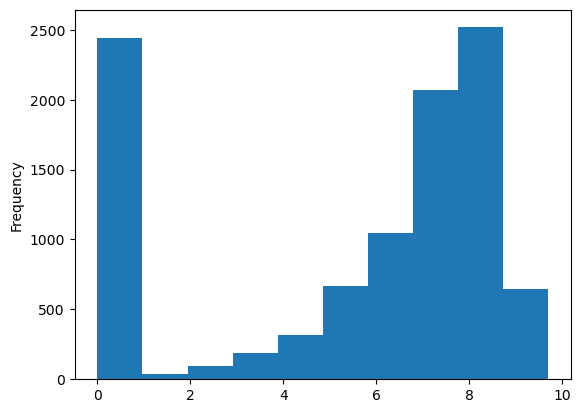

In [28]:
data.User_Score.plot.hist()

In [29]:
data.User_Score.fillna(data.User_Score.median(), inplace=True)

In [30]:
data.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
User_Score            0
Rating             6767
dtype: int64

In [31]:
data.Year_of_Release

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16714    2016.0
16715    2006.0
16716    2016.0
16717    2003.0
16718    2016.0
Name: Year_of_Release, Length: 16717, dtype: float64

In [32]:
data.Year_of_Release = data.Year_of_Release.astype("Int64")

In [33]:
data.Year_of_Release

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16714    2016
16715    2006
16716    2016
16717    2003
16718    2016
Name: Year_of_Release, Length: 16717, dtype: Int64

In [34]:
data.Year_of_Release.min()

1980

In [35]:
data.Year_of_Release.max()

2020

<Axes: ylabel='Frequency'>

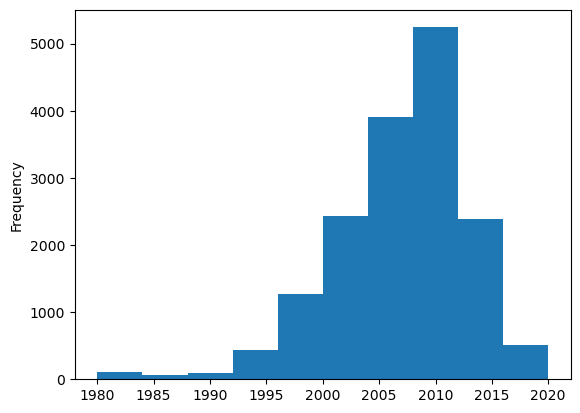

In [36]:
data.Year_of_Release.plot.hist()

In [37]:
data.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
User_Score            0
Rating             6767
dtype: int64

In [38]:
data[data.Year_of_Release.isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating
183,Madden NFL 2004,PS2,<NA>,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,6.9,NaN
609,Space Invaders,2600,<NA>,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,6.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,<NA>,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,0.0,E10+
16409,Freaky Flyers,GC,<NA>,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,6.5,T
16452,Inversion,PC,<NA>,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,6.7,M
16462,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,6.9,NaN


In [39]:
MissingYear = data[data.Year_of_Release.isna()].Name.tolist()

In [40]:
counter = 0
for game in MissingYear :
  print(game.split()[-1].isnumeric())
  if game.split()[-1].isnumeric() == True:
    counter += 1

True
True
False
True
False
False
False
False
True
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
True
True
False
False
True
False
True
False
False
True
False
True
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
True
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [41]:
counter

40

In [42]:
gameYear = [ ]
for game in data.Name :
  try :
    gameYear.append(int(game.split()[-1]))
  except :
    gameYear.append(None)

In [43]:
len(gameYear)

16717

In [44]:
gameYear.count(None)

14112

In [45]:
for i in data.Year_of_Release:
  if pd.isna(i):
    print("yes")

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [46]:
data.reset_index(inplace=True)

In [47]:
data

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8.0,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,6.9,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,6.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,6.9,NaN
16713,16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,6.9,NaN
16714,16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,6.9,NaN
16715,16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,6.9,NaN


In [48]:
data[675 : 660]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating


In [49]:
data.drop('index', axis=1, inplace=True)

In [50]:
data.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
User_Score            0
Rating             6767
dtype: int64

In [51]:
data[ data.Year_of_Release.isnull()].Year_of_Release

183      <NA>
377      <NA>
456      <NA>
475      <NA>
609      <NA>
         ... 
16374    <NA>
16407    <NA>
16450    <NA>
16460    <NA>
16524    <NA>
Name: Year_of_Release, Length: 269, dtype: Int64

In [52]:
type(data.Year_of_Release[657])

pandas._libs.missing.NAType

In [53]:
pd.NA

<NA>

In [54]:
data [ data.Year_of_Release.isnull() == True ]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating
183,Madden NFL 2004,PS2,<NA>,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,6.9,NaN
609,Space Invaders,2600,<NA>,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,6.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16374,PDC World Championship Darts 2008,PSP,<NA>,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,0.0,E10+
16407,Freaky Flyers,GC,<NA>,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,6.5,T
16450,Inversion,PC,<NA>,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,6.7,M
16460,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,6.9,NaN


In [55]:
for i in range(len(data)):
  year = str(data.Year_of_Release[i])
  if year.isnumeric() == False:
      print(i)

183
377
456
475
609
627
657
677
718
804
1130
1141
1300
1505
1537
1584
1608
1649
1698
1839
1983
2009
2105
2107
2131
2156
2168
2272
2280
2360
2452
2478
2491
2521
2535
2571
2772
2848
2968
3023
3080
3186
3222
3232
3288
3351
3412
3458
3485
3703
3738
3882
3996
4126
4131
4204
4219
4293
4336
4372
4436
4444
4634
4647
4774
4817
4847
4944
4958
5040
5069
5155
5193
5293
5325
5335
5442
5491
5587
5623
5641
5654
5768
5799
5856
5873
5888
5931
6019
6101
6133
6180
6199
6255
6266
6293
6299
6342
6356
6476
6624
6636
6773
6818
6861
6899
6954
6999
7008
7108
7210
7332
7353
7354
7367
7387
7391
7406
7584
7605
7724
7735
7848
8023
8067
8150
8151
8197
8212
8250
8260
8319
8364
8500
8547
8632
8680
8740
8884
8918
9043
9119
9151
9218
9293
9380
9485
9516
9664
9703
9706
9738
9761
9817
9827
9830
9855
9876
10050
10258
10317
10465
10486
10612
10686
10764
10790
10837
10993
11000
11016
11092
11119
11338
11377
11433
11455
11550
11565
11622
11790
11832
11925
11943
11954
11957
12003
12011
12046
12209
12217
12221
12235
12241
1252

In [56]:
data.Year_of_Release = data.Year_of_Release.astype(str)

In [57]:
data.Year_of_Release.replace('<NA>', np.nan, inplace=True)

In [58]:
data.Year_of_Release[183]

nan

In [59]:
data.Year_of_Release.isna().sum()

269

In [60]:
newyear = [ ]
for i in range(len(data)):
  if data["Name"][i].split()[-1].isnumeric() == True and type(data.Year_of_Release[i])== float:
    newyear.append(int(data["Name"][i].split()[-1]))
  else:
    newyear.append(data.Year_of_Release[i])

In [61]:
newyear

['2006',
 '1985',
 '2008',
 '2009',
 '1996',
 '1989',
 '2006',
 '2006',
 '2009',
 '1984',
 '2005',
 '2005',
 '1999',
 '2007',
 '2010',
 '2009',
 '2013',
 '2004',
 '1990',
 '2005',
 '2006',
 '1989',
 '1988',
 '2013',
 '2002',
 '2002',
 '2005',
 '2010',
 '2001',
 '2011',
 '1998',
 '2015',
 '2010',
 '2013',
 '2012',
 '2012',
 '2009',
 '2011',
 '2001',
 '2008',
 '2011',
 '2010',
 '2014',
 '2005',
 '2007',
 '1996',
 '2009',
 '2014',
 '2004',
 '2007',
 '1992',
 '2008',
 '1997',
 '2011',
 '2010',
 '2009',
 '1993',
 '2008',
 '2004',
 '2004',
 '2013',
 '2011',
 '2012',
 '1996',
 '2010',
 '1997',
 '2012',
 '1999',
 '2010',
 '2013',
 '2007',
 '1994',
 '2013',
 '2012',
 '2007',
 '2011',
 '1992',
 '2015',
 '2004',
 '2010',
 '2007',
 '2012',
 '1997',
 '2012',
 '2001',
 '2009',
 '2007',
 '2015',
 '1999',
 '1982',
 '2008',
 '2005',
 '2014',
 '1998',
 '2016',
 '1997',
 '2014',
 '2010',
 '1988',
 '2015',
 '2008',
 '2011',
 '2003',
 '2009',
 '2011',
 '2015',
 '1998',
 '2006',
 '2016',
 '1998',
 '2014',
 

In [62]:
data["newyear"] = newyear

In [63]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating,newyear
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8.0,E,2006
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,6.9,NaN,1985
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,E,2008
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,E,2009
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,6.9,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,6.9,NaN,2016
16713,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,6.9,NaN,2006
16714,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,6.9,NaN,2016
16715,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,6.9,NaN,2003


In [64]:
data.newyear.isna().sum()

229

In [65]:
if "Year_of_Release" in data.columns:
    data.drop(["Year_of_Release"], inplace=True , axis = 1)
if "Year" in data.columns:
    data.drop(["Year"], inplace=True , axis = 1)
data.drop(["Year_of_Release", "Year"], inplace=True, axis=1, errors='ignore')

In [66]:
data

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating,newyear
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8.0,E,2006
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,6.9,NaN,1985
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,E,2008
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,E,2009
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,6.9,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...
16712,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,6.9,NaN,2016
16713,LMA Manager 2007,X360,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,6.9,NaN,2006
16714,Haitaka no Psychedelica,PSV,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,6.9,NaN,2016
16715,Spirits & Spells,GBA,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,6.9,NaN,2003


In [67]:
data.rename(columns={"newyear": "Release_Year"}, inplace=True)

In [68]:
data

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating,Release_Year
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8.0,E,2006
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,6.9,NaN,1985
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,E,2008
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,E,2009
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,6.9,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...
16712,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,6.9,NaN,2016
16713,LMA Manager 2007,X360,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,6.9,NaN,2006
16714,Haitaka no Psychedelica,PSV,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,6.9,NaN,2016
16715,Spirits & Spells,GBA,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,6.9,NaN,2003


In [69]:
data.isnull().sum()

Name               0
Platform           0
Genre              0
Publisher         54
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
User_Score         0
Rating          6767
Release_Year     229
dtype: int64